# Match RMG Reaction SMILES

In [1]:
import os
import sys
import subprocess

# To add this RDMC into PYTHONPATH in case you haven't do it
sys.path.append(os.path.dirname(os.path.abspath('')))

from rdmc.mol import RDKitMol
try:
    # import RMG dependencies
    from rdmc.external.rmg import (from_rdkit_mol,
                                   load_rmg_database,
                                   generate_reaction_complex,)
    # Load RMG database
    database = load_rmg_database()
    from rmgpy.molecule import Molecule
except (ImportError, ModuleNotFoundError):
    print('You need to install RMG-Py first and run this IPYNB in rmg_env!')
    
%load_ext autoreload
%autoreload 2

## Examples

H_migration

In [2]:
reactants = [
"""[CH2]CCCCO""",]            

products = [
"""CCCCC[O]""",]

Retroene

In [3]:
reactants = [
""" C1=CC(C2C=CCC2)C=C1""",]            

products = [
"""C1=CC=CC1""",
"""C1=CC=CC1""",]

H abstraction

In [4]:
reactants = [
"""[CH3]""",
"""CCCCO""",]            

products = [
"""C""",
"""[CH2]CCCO""",]

## Generate reactant and product complex

In [5]:
try:
    # Generate RMG Molecule
    reactant_molecules = [Molecule().from_smiles(r) for r in reactants]
    product_molecules = [Molecule().from_smiles(p) for p in products]
except Exception as e:
    print(e)
    print('Have issues generating molecules.')
else:
    # A product complex with the same atom indexing as the reactant is generated
    reactant_complex, product_complex = generate_reaction_complex(
                                            database,
                                            reactant_molecules,
                                            product_molecules,
                                            verbose=True)
    
r_mol = RDKitMol.FromRMGMol(reactant_complex)
p_mol = RDKitMol.FromRMGMol(product_complex)

[CH3] + CCCCO <=> C + [CH2]CCCO
RMG family: H_Abstraction
Is forward reaction: True


### Generate SMILES

Reactant

In [6]:
r_mol.ToSmiles(RemoveAtomMap=False, removeHs=False).split('.')

['[C:0]([H:1])([H:2])[H:3]',
 '[C:4]([C:5]([C:6]([C:7]([O:8][H:18])([H:16])[H:17])([H:14])[H:15])([H:12])[H:13])([H:9])([H:10])[H:11]']

Product

In [7]:
p_mol.ToSmiles(RemoveAtomMap=False, removeHs=False).split('.')

['[C:0]([H:1])([H:2])([H:3])[H:9]',
 '[C:4]([C:5]([C:6]([C:7]([O:8][H:18])([H:16])[H:17])([H:14])[H:15])([H:12])[H:13])([H:10])[H:11]']

Double check by Molecule graph

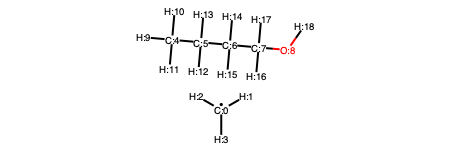

In [8]:
r_mol

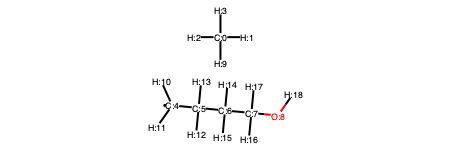

In [9]:
p_mol